In [22]:
import pymc as pm
import arviz as az
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import multiprocessing
import time
from waterdataprep import *
from clusterer import HierarchicalClusterer

In [23]:
# import glob 
# import os

# file = glob.glob('*.csv')
# df = pd.read_csv(file[0])
# cols = df.columns.to_list()
# id_cols = [col for col in cols if ':' not in col]
# transparent_col = [col for col in cols if 'transparencies' in col]
# id_cols.extend(transparent_col)
# df = df[id_cols]

In [24]:
from dotenv import load_dotenv
import boto3
import s3fs
import os

load_dotenv()
os.environ['AWS_ACCESS_KEY_ID'] = os.getenv('AWS_ACCESS_KEY')
os.environ['AWS_SECRET_ACCESS_KEY'] = os.getenv('AWS_SECRET_ACCESS_KEY')
os.environ['AWS_DEFAULT_REGION'] = 'us-west-2'

s3_url = "s3://hes-dscap-staging/jessica/metadata_0420_df.parquet"
df = pd.read_parquet(s3_url)

In [25]:
df[df['transparenciesMeasuredAt'].str.contains('2cms long')]

,transparenciesMeasuredAt,siteId,transparenciesUserid,countryCode,countryName,elevation,organizationId,organizationName,protocol,siteName,...,latitude,longitude,transparenciesGlobeTeams,harvard_class,depth_gebco_year,depth_depth,distance_distance_from_water,distance_soure_of_distance_from_water,tube_estimated_tube_length,tube_depth_index
8572,"2cms long""",20984,false,USA,United States,13.0,124341,St. Barnabas School,transparencies,St. Johns River at Hwy 44:SWS-01,...,normal,29.0056,-81.2295,River_Stream,NaN,NaN,NaN,None,NaN,NaN


In [26]:
waterprep =WaterDataPrep(df, 
                         water_body_source_col='harvard_class', 
                         lat_col = 'latitude',
                         lon_col = 'longitude',
                         date_col = 'transparenciesMeasuredAt',
                         )
waterprep.prepare_data(drop_invalid_dates = True)
# waterprep.prepare_data()aa
# waterprep.create_measurement_dfs()
# waterprep.create_water_source_dfs()a

Starting water data preparation pipeline...
Cleaning dates and dropping invalid rows...
  - Dropped 7 rows with invalid dates
Step 1: Determining primary measurement type for each row...
  - Primary measurement type counts:
    - tube: 122070
    - disk: 33020
    - none: 5135
    - sensor: 41
Adding measurement availability flags...
  - Added measurement flags and count
Standardizing water source names...
Unknowns filled
  - Found 9 unique water sources:
    - River_Stream: 73408
    - Pond_Lake: 22887
    - Ocean: 22574
    - Marsh: 20703
    - Non-Natural: 8618
    - Inconclusive: 8405
    - Unknown: 2409
    - Insufficient: 1261
    - Mud Flats Or Estuary: 1
Adding coordinate validity flags...
  - 160266/160266 rows have valid coordinates
Adding date features...
  - No date column found
Adding seasonal features...
  - Season counts:
    - Autumn: 47213
    - Winter: 41670
    - Spring: 38827
    - Summer: 30805
    - Unknown: 1751
Creating composite keys...
  - Created composite ke

,transparenciesMeasuredAt,siteId,transparenciesUserid,countryCode,countryName,elevation,organizationId,organizationName,protocol,siteName,...,primary_measurement_type,has_disk_measurement,has_tube_measurement,has_sensor_measurement,num_measurement_types,water_source_standardized,water_source_key,has_valid_coordinates,season,measurement_source_key
0,2003-07-05 10:00:00,13663,-1,THA,Thailand,222.7,206260,Suanmon School,transparencies,Lumtakong 01 luntakong:SWS-03,...,disk,True,False,False,1,River_Stream,river_stream,True,Summer,disk_river_stream
1,2003-07-05 12:54:00,23246,-1,USA,United States,46.1,197983,Seekonk Middle School,transparencies,"Seekonk Middle School, Turner Reservoir Site:S...",...,tube,False,True,False,1,Marsh,marsh,True,Summer,tube_marsh
2,2003-07-05 09:30:00,23351,-1,USA,United States,30.9,19869,Westport High School,transparencies,GooseBerry Neck Boat Ramp:SWS-01,...,tube,False,True,False,1,Ocean,ocean,True,Summer,tube_ocean
3,2003-07-05 08:00:00,4845,-1,GHA,Ghana,284.3,124154,Kintampo Secondary School,transparencies,KINSSGLOBE HYDROLOGY SITE 3 (RAAFIN BATURE BEH...,...,tube,False,True,False,1,River_Stream,river_stream,True,Summer,tube_river_stream
4,2003-07-05 10:00:00,13661,-1,THA,Thailand,222.7,206260,Suanmon School,transparencies,Lumtakong:SWS-01,...,disk,True,False,False,1,Marsh,marsh,True,Summer,disk_marsh
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
160268,1995-10-23 16:00:00,27787,-1,USA,United States,196.0,57134,New Miami Jr./Sr. High School,transparencies,4 MILE CREEK:SWS-03,...,tube,False,True,False,1,River_Stream,river_stream,True,Autumn,tube_river_stream
160269,1995-10-16 15:00:00,3272,-1,DEU,Germany,12.0,97053,Gymnasium Ohmoor,transparencies,Tarpenbek - Rahmoorbrucke:SWS-02,...,disk,True,False,False,1,Pond_Lake,pond_lake,True,Autumn,disk_pond_lake
160270,1995-09-25 14:00:00,3272,-1,DEU,Germany,12.0,97053,Gymnasium Ohmoor,transparencies,Tarpenbek - Rahmoorbrucke:SWS-02,...,disk,True,False,False,1,Pond_Lake,pond_lake,True,Autumn,disk_pond_lake
160271,1995-08-17 15:00:00,3272,-1,DEU,Germany,12.0,97053,Gymnasium Ohmoor,transparencies,Tarpenbek - Rahmoorbrucke:SWS-02,...,disk,True,False,False,1,Pond_Lake,pond_lake,True,Summer,disk_pond_lake


In [27]:
# Clustering
eps_dict = {
    'River_Stream': 5.0,    # 1km for rivers/streams
    'Pond_Lake': 8.0,       # 1km for ponds/lakes
    'Ocean': 15.0,          # 10km for oceans
    'Marsh': 2.0,           # 2km for marshes
    'Insufficient': 1.0,    # 1km default
    'Non-Natural': 0.25,    # 250m for artificial water bodies
    'Inconclusive': 1.0,    # 1km default
    'Unknown': 1.0          # 1km default
}

clusterer = HierarchicalClusterer(default_eps = 1.0, lat_col = 'latitude',lon_col='longitude', site_id_col='siteId')
clustered_df = clusterer.cluster(waterprep.df, eps_dict=eps_dict, output_dir="./output")


Starting hierarchical clustering with custom radii per water body type
Default radius: 1.0km
Custom radii:
  - River_Stream: 5.0km
  - Pond_Lake: 8.0km
  - Ocean: 15.0km
  - Marsh: 2.0km
  - Insufficient: 1.0km
  - Non-Natural: 0.25km
  - Inconclusive: 1.0km
  - Unknown: 1.0km
Reduced 160266 observations to 6073 unique site-measurement combinations
Split data into 4 measurement types

Processing measurement type: disk
  Processing water body: River_Stream (eps=5.0km)
    - Saved mapping to: ./output/disk/site_cluster_map_River_Stream.csv
  - disk/River_Stream: 406 clusters, 0 noise points
  Processing water body: Marsh (eps=2.0km)
    - Saved mapping to: ./output/disk/site_cluster_map_Marsh.csv
  - disk/Marsh: 189 clusters, 0 noise points
  Processing water body: Inconclusive (eps=1.0km)
    - Saved mapping to: ./output/disk/site_cluster_map_Inconclusive.csv
  - disk/Inconclusive: 38 clusters, 0 noise points
  Processing water body: Pond_Lake (eps=8.0km)
    - Saved mapping to: ./outpu

In [7]:
mask = clustered_df['has_tube_measurement'] == True
clustered_df.loc[mask, 'pct_clear'] = clustered_df.loc[mask, 'transparenciesTubeImageDisappearanceCm'] / clustered_df.loc[mask, 'tube_estimated_tube_length']

In [ ]:
from cluster_filter import ClusterFilter

def diagnose_pct_clear_issues(df, measurement_col='transparenciesTubeImageDisappearanceCm', 
                             estimated_length_col='tube_estimated_tube_length',
                             pct_clear_col='pct_clear'):
    """
    Diagnose issues with pct_clear calculation.
    """
    # Create mask for tube measurements
    tube_mask = df['has_tube_measurement'] == True
    tube_df = df[tube_mask].copy()
    
    # Analyze the estimated tube length column
    print(f"Total tube measurements: {len(tube_df)}")
    print(f"NaN estimated lengths: {tube_df[estimated_length_col].isna().sum()}")
    print(f"Zero estimated lengths: {(tube_df[estimated_length_col] == 0).sum()}")
    print(f"Negative estimated lengths: {(tube_df[estimated_length_col] < 0).sum()}")
    
    # Check for infinite pct_clear values
    inf_count = np.isinf(tube_df[pct_clear_col]).sum()
    print(f"Infinite pct_clear values: {inf_count}")
    
    # Distribution of estimated tube lengths
    valid_lengths = tube_df[estimated_length_col].dropna()
    valid_lengths = valid_lengths[valid_lengths > 0]
    
    if len(valid_lengths) > 0:
        print(f"\nEstimated tube length statistics:")
        print(f"Mean: {valid_lengths.mean():.2f}")
        print(f"Median: {valid_lengths.median():.2f}")
        print(f"Min: {valid_lengths.min():.2f}")
        print(f"Max: {valid_lengths.max():.2f}")
    
    # Analyze clusters with problematic values
    problem_clusters = tube_df[np.isinf(tube_df[pct_clear_col]) | 
                              tube_df[pct_clear_col].isna()]['cluster_type_id'].value_counts()
    
    print(f"\nClusters with inf/NaN pct_clear values:")
    print(problem_clusters.head(10))
    
    return tube_df

def fix_pct_clear_calculation(df, measurement_col='transparenciesTubeImageDisappearanceCm', 
                             estimated_length_col='tube_estimated_tube_length',
                             pct_clear_col='pct_clear',
                             default_length=None,
                             min_length=1.0):
    """
    Fix pct_clear calculation by handling edge cases.
    
    Parameters:
    - default_length: Default tube length to use when estimated length is invalid
    - min_length: Minimum valid tube length
    """
    df = df.copy()
    
    # First, let's analyze what we have
    mask = df['has_tube_measurement'] == True
    
    # Handle invalid estimated lengths
    if default_length is None:
        # Calculate default from valid lengths
        valid_lengths = df.loc[mask, estimated_length_col].dropna()
        valid_lengths = valid_lengths[valid_lengths > min_length]
        
        if len(valid_lengths) > 0:
            default_length = valid_lengths.median()
            print(f"Using median valid length as default: {default_length:.2f}")
        else:
            default_length = 100.0  # Standard transparency tube length
            print(f"No valid lengths found, using standard: {default_length}")
    
    # Create a clean estimated length column
    df['tube_length_clean'] = df[estimated_length_col].copy()
    
    # Replace invalid values
    invalid_mask = (
        df['tube_length_clean'].isna() | 
        (df['tube_length_clean'] <= min_length) |
        np.isinf(df['tube_length_clean'])
    )
    
    df.loc[mask & invalid_mask, 'tube_length_clean'] = default_length
    
    # Recalculate pct_clear
    df.loc[mask, 'pct_clear_fixed'] = (
        df.loc[mask, measurement_col] / df.loc[mask, 'tube_length_clean']
    )
    
    # Cap values at reasonable bounds (0 to 1)
    df.loc[mask, 'pct_clear_fixed'] = df.loc[mask, 'pct_clear_fixed'].clip(0, 1)
    
    # Report changes
    print(f"\nFixed {invalid_mask.sum()} invalid tube lengths")
    print(f"Original inf values: {np.isinf(df[pct_clear_col]).sum()}")
    print(f"Fixed inf values: {np.isinf(df['pct_clear_fixed']).sum()}")
    
    return df

def analyze_repeated_values(df, cluster_col='cluster_type_id', 
                           measurement_col='transparenciesTubeImageDisappearanceCm'):
    """
    Analyze clusters where the same value is reported multiple times.
    """
    repeated_value_clusters = []
    
    for cluster_id, cluster_df in df.groupby(cluster_col):
        values = cluster_df[measurement_col].dropna()
        
        if len(values) > 0:
            # Check for repeated values
            value_counts = values.value_counts()
            max_count = value_counts.max()
            most_common_value = value_counts.index[0]
            
            # Check if one value dominates
            if max_count / len(values) > 0.9:  # 90% or more are the same value
                repeated_value_clusters.append({
                    'cluster_id': cluster_id,
                    'total_obs': len(values),
                    'repeated_value': most_common_value,
                    'repeat_count': max_count,
                    'repeat_percentage': max_count / len(values) * 100,
                    'unique_values': len(value_counts)
                })
    
    repeated_df = pd.DataFrame(repeated_value_clusters)
    
    if len(repeated_df) > 0:
        repeated_df = repeated_df.sort_values('repeat_percentage', ascending=False)
        print(f"Found {len(repeated_df)} clusters with highly repeated values")
        print("\nTop 10 clusters with repeated values:")
        print(repeated_df.head(10))
    
    return repeated_df

# Usage example:
# First, diagnose the issues
tube_df = diagnose_pct_clear_issues(clustered_df)

# Fix the pct_clear calculation
fixed_df = fix_pct_clear_calculation(clustered_df)

# Analyze repeated values
repeated_clusters = analyze_repeated_values(clustered_df)

# Now recalculate cluster statistics with fixed values
mask = fixed_df['has_tube_measurement'] == True
fixed_df.loc[mask, 'measurement_for_analysis'] = fixed_df.loc[mask, 'pct_clear_fixed']

# Use this fixed data for your Bayesian model
cluster_filter = ClusterFilter(
    fixed_df,
    cluster_col='cluster_type_id',
    measurement_cols={'tube': 'measurement_for_analysis'},
    site_col='site_id'
)
fixed_cluster_stats = cluster_filter.analyze_clusters()

In [10]:
measurement_dict = {
    'tube':'pct_clear',
    'sensor':'transparenciesSensorTurbidityNtu',
    'disk':'transparenciesTransparencyDiskImageDisappearanceM'
}

In [11]:
cluster_filter = ClusterFilter(clustered_df,
                               cluster_col = 'cluster_type_id',
                               measurement_cols= measurement_dict)

Note: Cluster IDs must contain measurement type strings for proper mapping.
Expected measurement types in cluster IDs: ['tube', 'sensor', 'disk']


In [14]:
df_analyze = cluster_filter.analyze_clusters()

  Cluster ID should contain one of: ['tube', 'sensor', 'disk']
  Cluster ID should contain one of: ['tube', 'sensor', 'disk']
  Cluster ID should contain one of: ['tube', 'sensor', 'disk']
  Cluster ID should contain one of: ['tube', 'sensor', 'disk']
  Cluster ID should contain one of: ['tube', 'sensor', 'disk']
  Cluster ID should contain one of: ['tube', 'sensor', 'disk']
  Cluster ID should contain one of: ['tube', 'sensor', 'disk']
  Cluster ID should contain one of: ['tube', 'sensor', 'disk']
  Cluster ID should contain one of: ['tube', 'sensor', 'disk']
  Cluster ID should contain one of: ['tube', 'sensor', 'disk']
  Cluster ID should contain one of: ['tube', 'sensor', 'disk']
  Cluster ID should contain one of: ['tube', 'sensor', 'disk']
  Cluster ID should contain one of: ['tube', 'sensor', 'disk']
  Cluster ID should contain one of: ['tube', 'sensor', 'disk']
  Cluster ID should contain one of: ['tube', 'sensor', 'disk']
  Cluster ID should contain one of: ['tube', 'sensor', 

/Users/jwu/Documents/Classwork/NASA_Capstone/github/Kd_Variance/kdvar/lib/python3.11/site-packages/pandas/core/nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)
/Users/jwu/Documents/Classwork/NASA_Capstone/github/Kd_Variance/kdvar/lib/python3.11/site-packages/pandas/core/nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)
/Users/jwu/Documents/Classwork/NASA_Capstone/github/Kd_Variance/kdvar/lib/python3.11/site-packages/pandas/core/nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)
/Users/jwu/Documents/Classwork/NASA_Capstone/github/Kd_Variance/kdvar/lib/python3.11/site-packages/numpy/lib/_function_base_impl.py:4653: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)
/Users/jwu/Documents/Classwork/NASA_Capstone/github/Kd_Variance/kdvar/lib/python3.11/site-packages/num

In [18]:
df_analyze[df_analyze['measurement_type']=='tube'].sort_values(by='n_obs',ascending=False)

,cluster_id,measurement_type,measurement_column,n_obs,n_missing,mean,median,std,cv,robust_cv,iqr,min,max
1681,tube_Ocean_432,tube,pct_clear,6714,0,inf,1.000,NaN,NaN,0.000000,0.000,0.100000,inf
1682,tube_Ocean_433,tube,pct_clear,2478,0,0.999448,1.000,0.020452,0.020464,0.000000,0.000,0.177778,1.122222
1563,tube_Non-Natural_1688,tube,pct_clear,2450,0,inf,1.000,NaN,NaN,0.000000,0.000,0.100000,inf
1105,tube_Inconclusive_2237,tube,pct_clear,2169,0,0.998325,1.000,0.031246,0.031299,0.000000,0.000,0.416667,1.166667
2789,tube_River_Stream_489,tube,pct_clear,2133,0,inf,0.425,NaN,NaN,1.352941,0.575,0.066667,inf
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1518,tube_Marsh_81,tube,pct_clear,0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2092,tube_Pond_Lake_2116,tube,pct_clear,0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3222,tube_River_Stream_922,tube,pct_clear,0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2127,tube_Pond_Lake_2151,tube,pct_clear,0,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


/Users/jwu/Documents/Classwork/NASA_Capstone/github/Kd_Variance/kdvar/lib/python3.11/site-packages/numpy/lib/_function_base_impl.py:2888: RuntimeWarning: invalid value encountered in subtract
  X -= avg[:, None]
/Users/jwu/Documents/Classwork/NASA_Capstone/github/Kd_Variance/kdvar/lib/python3.11/site-packages/pandas/core/nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)


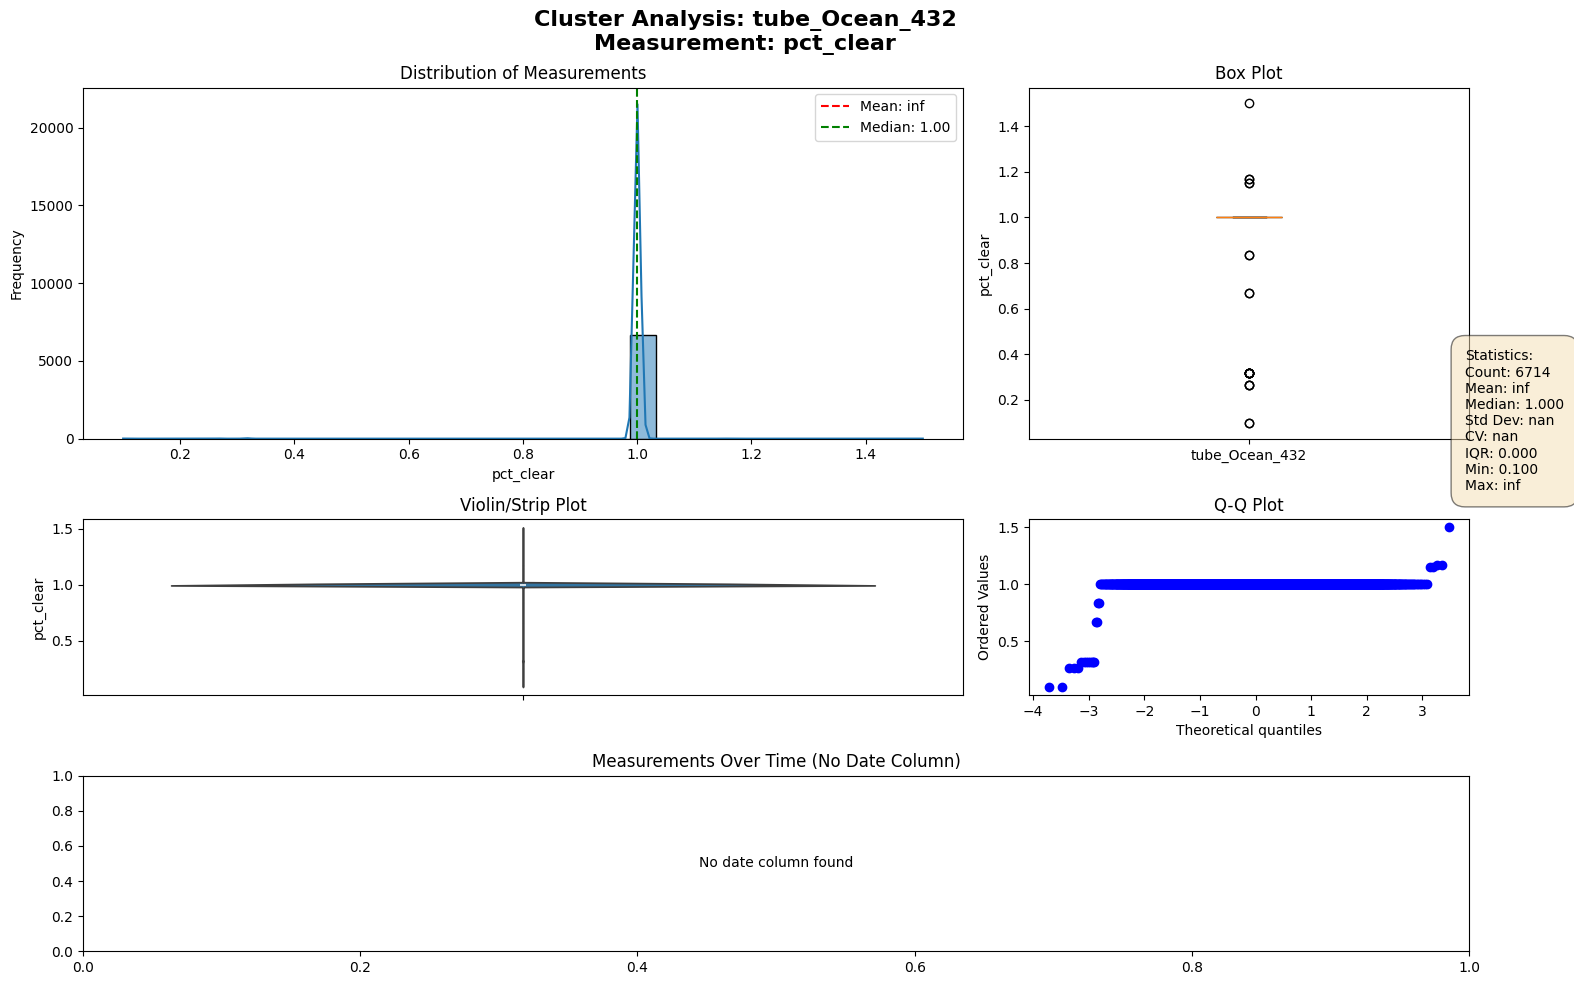

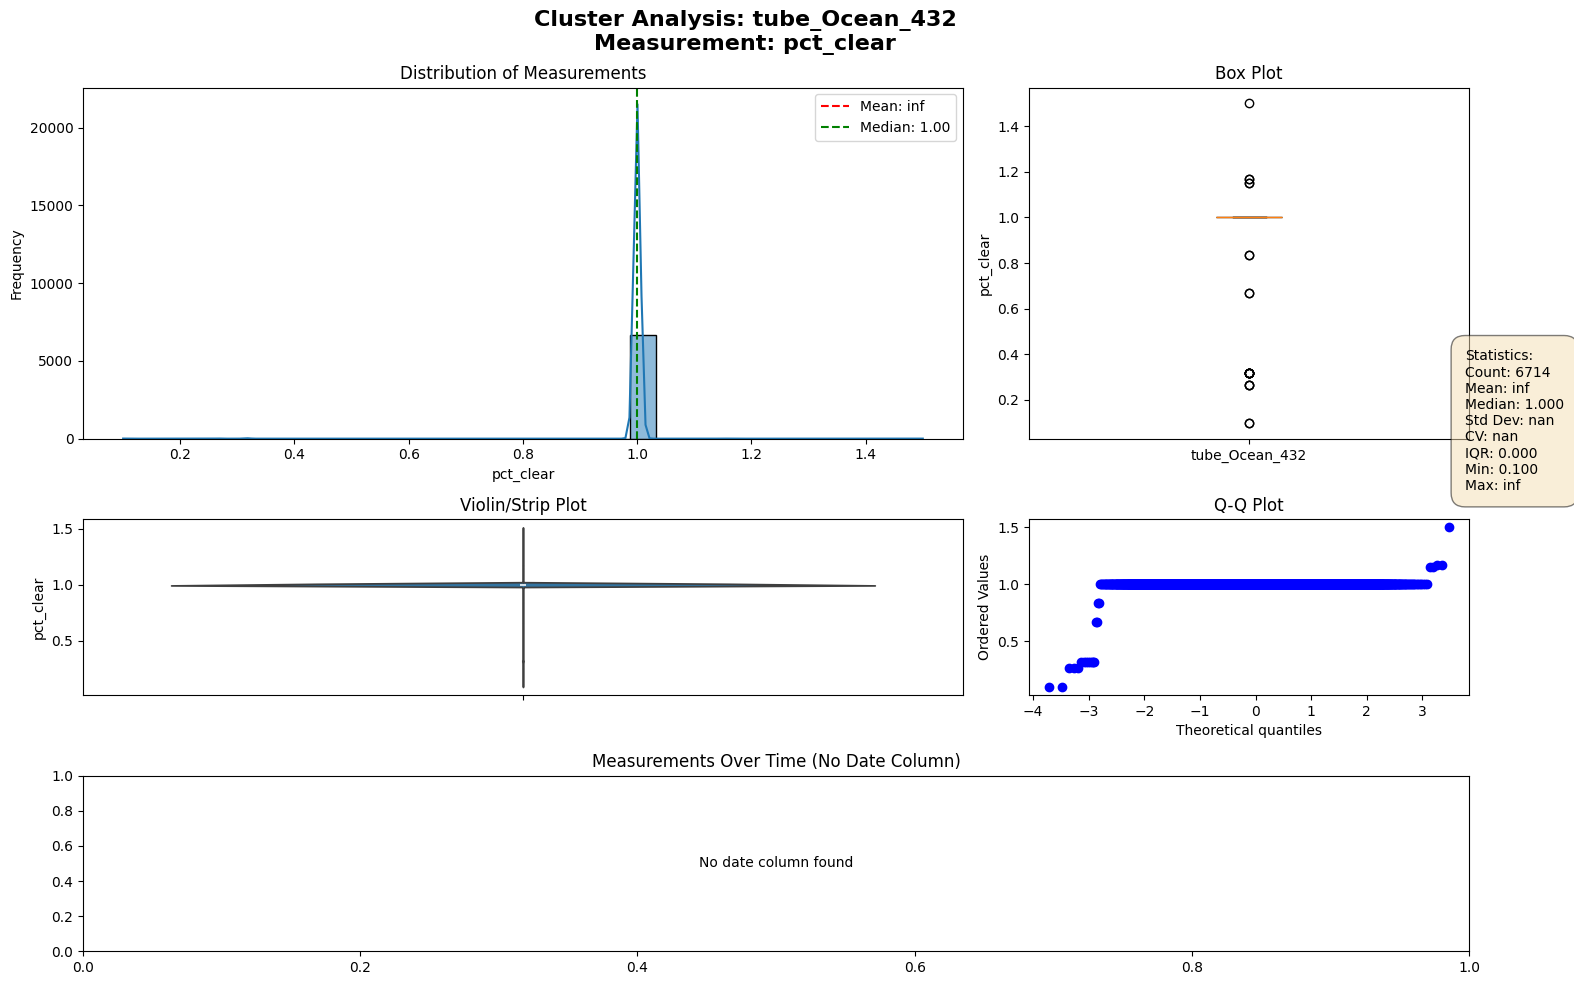

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats

def visualize_cluster(df, cluster_type_id, measurement_col, figsize=(15, 10)):
    """
    Visualize a specific cluster with distribution plots and box plots.
    
    Parameters:
    - df: DataFrame with cluster data
    - cluster_type_id: The specific cluster to visualize
    - measurement_col: The measurement column to analyze
    - figsize: Figure size (width, height)
    
    Returns:
    - fig: matplotlib figure object
    """
    # Filter data for the specific cluster
    cluster_data = df[df['cluster_type_id'] == cluster_type_id].copy()
    
    if len(cluster_data) == 0:
        print(f"No data found for cluster_type_id: {cluster_type_id}")
        return None
    
    # Get the measurement values
    values = cluster_data[measurement_col].dropna()
    
    if len(values) == 0:
        print(f"No valid measurements found for {measurement_col} in cluster {cluster_type_id}")
        return None
    
    # Create figure with subplots
    fig = plt.figure(figsize=figsize)
    gs = fig.add_gridspec(3, 2, height_ratios=[2, 1, 1], width_ratios=[2, 1])
    
    # Main title
    fig.suptitle(f'Cluster Analysis: {cluster_type_id}\nMeasurement: {measurement_col}', 
                 fontsize=16, fontweight='bold')
    
    # 1. Histogram with KDE
    ax1 = fig.add_subplot(gs[0, 0])
    sns.histplot(values, kde=True, ax=ax1, bins=min(30, len(values)//2))
    ax1.set_xlabel(measurement_col)
    ax1.set_ylabel('Frequency')
    ax1.set_title('Distribution of Measurements')
    
    # Add vertical lines for mean and median
    ax1.axvline(values.mean(), color='red', linestyle='--', 
                label=f'Mean: {values.mean():.2f}')
    ax1.axvline(values.median(), color='green', linestyle='--', 
                label=f'Median: {values.median():.2f}')
    ax1.legend()
    
    # 2. Box plot
    ax2 = fig.add_subplot(gs[0, 1])
    box_parts = ax2.boxplot(values, vert=True, patch_artist=True)
    for patch in box_parts['boxes']:
        patch.set_facecolor('lightblue')
    ax2.set_ylabel(measurement_col)
    ax2.set_xticklabels([cluster_type_id])
    ax2.set_title('Box Plot')
    
    # 3. Violin plot (if enough data points)
    ax3 = fig.add_subplot(gs[1, 0])
    if len(values) > 10:
        sns.violinplot(y=values, ax=ax3, inner='box')
    else:
        sns.stripplot(y=values, ax=ax3, size=10, alpha=0.7)
    ax3.set_ylabel(measurement_col)
    ax3.set_title('Violin/Strip Plot')
    
    # 4. Q-Q plot
    ax4 = fig.add_subplot(gs[1, 1])
    stats.probplot(values, dist="norm", plot=ax4)
    ax4.set_title('Q-Q Plot')
    
    # 5. Time series if date column exists
    ax5 = fig.add_subplot(gs[2, :])
    if 'measured_on' in cluster_data.columns or 'date' in cluster_data.columns:
        date_col = 'measured_on' if 'measured_on' in cluster_data.columns else 'date'
        temp_df = cluster_data.copy()
        temp_df[date_col] = pd.to_datetime(temp_df[date_col], errors='coerce')
        temp_df = temp_df.dropna(subset=[date_col, measurement_col])
        
        if len(temp_df) > 0:
            temp_df = temp_df.sort_values(date_col)
            ax5.scatter(temp_df[date_col], temp_df[measurement_col], alpha=0.6)
            ax5.plot(temp_df[date_col], temp_df[measurement_col], alpha=0.3)
            ax5.set_xlabel('Date')
            ax5.set_ylabel(measurement_col)
            ax5.set_title('Measurements Over Time')
            ax5.tick_params(axis='x', rotation=45)
        else:
            ax5.text(0.5, 0.5, 'No valid date data available', 
                    ha='center', va='center', transform=ax5.transAxes)
            ax5.set_title('Measurements Over Time (No Date Data)')
    else:
        ax5.text(0.5, 0.5, 'No date column found', 
                ha='center', va='center', transform=ax5.transAxes)
        ax5.set_title('Measurements Over Time (No Date Column)')
    
    # Add statistics box
    stats_text = f"""Statistics:
Count: {len(values)}
Mean: {values.mean():.3f}
Median: {values.median():.3f}
Std Dev: {values.std():.3f}
CV: {values.std()/values.mean():.3f}
IQR: {values.quantile(0.75) - values.quantile(0.25):.3f}
Min: {values.min():.3f}
Max: {values.max():.3f}"""
    
    plt.figtext(0.98, 0.5, stats_text, fontsize=10, 
                bbox=dict(boxstyle="round,pad=1", facecolor="wheat", alpha=0.5))
    
    plt.tight_layout()
    return fig

# Alternative function for comparing multiple clusters
def compare_clusters(df, cluster_ids, measurement_col, figsize=(15, 8)):
    """
    Compare multiple clusters side by side.
    
    Parameters:
    - df: DataFrame with cluster data
    - cluster_ids: List of cluster_type_ids to compare
    - measurement_col: The measurement column to analyze
    - figsize: Figure size (width, height)
    
    Returns:
    - fig: matplotlib figure object
    """
    fig, axes = plt.subplots(2, 2, figsize=figsize)
    axes = axes.flatten()
    
    # Prepare data for comparison
    plot_data = []
    for cluster_id in cluster_ids:
        cluster_data = df[df['cluster_type_id'] == cluster_id][measurement_col].dropna()
        if len(cluster_data) > 0:
            plot_data.extend([(cluster_id, val) for val in cluster_data])
    
    if not plot_data:
        print("No valid data found for comparison")
        return None
    
    plot_df = pd.DataFrame(plot_data, columns=['cluster', 'value'])
    
    # 1. Box plot comparison
    sns.boxplot(data=plot_df, x='cluster', y='value', ax=axes[0])
    axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=45, ha='right')
    axes[0].set_title('Box Plot Comparison')
    axes[0].set_xlabel('Cluster ID')
    axes[0].set_ylabel(measurement_col)
    
    # 2. Violin plot comparison
    if len(plot_df) > 10:
        sns.violinplot(data=plot_df, x='cluster', y='value', ax=axes[1])
    else:
        sns.stripplot(data=plot_df, x='cluster', y='value', ax=axes[1], size=10, alpha=0.7)
    axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=45, ha='right')
    axes[1].set_title('Violin/Strip Plot Comparison')
    axes[1].set_xlabel('Cluster ID')
    axes[1].set_ylabel(measurement_col)
    
    # 3. Distribution overlay
    for cluster_id in cluster_ids:
        cluster_data = df[df['cluster_type_id'] == cluster_id][measurement_col].dropna()
        if len(cluster_data) > 0:
            sns.kdeplot(data=cluster_data, ax=axes[2], label=cluster_id, alpha=0.7)
    axes[2].set_title('Distribution Overlay')
    axes[2].set_xlabel(measurement_col)
    axes[2].set_ylabel('Density')
    axes[2].legend()
    
    # 4. Statistical comparison
    stats_data = []
    for cluster_id in cluster_ids:
        cluster_data = df[df['cluster_type_id'] == cluster_id][measurement_col].dropna()
        if len(cluster_data) > 0:
            stats_data.append({
                'Cluster': cluster_id,
                'Count': len(cluster_data),
                'Mean': cluster_data.mean(),
                'Median': cluster_data.median(),
                'Std Dev': cluster_data.std(),
                'CV': cluster_data.std() / cluster_data.mean() if cluster_data.mean() != 0 else np.nan
            })
    
    if stats_data:
        stats_df = pd.DataFrame(stats_data)
        axes[3].axis('tight')
        axes[3].axis('off')
        table = axes[3].table(cellText=stats_df.round(3).values,
                             colLabels=stats_df.columns,
                             cellLoc='center',
                             loc='center')
        table.auto_set_font_size(False)
        table.set_fontsize(9)
        table.scale(1.2, 1.5)
        axes[3].set_title('Statistical Comparison')
    
    plt.suptitle(f'Cluster Comparison: {measurement_col}', fontsize=16, fontweight='bold')
    plt.tight_layout()
    return fig

# Example usage:
"""
# Visualize a single cluster
fig = visualize_cluster(df, 'tube_River_Stream_0', 'transparencies:tube image disappearance (cm)')
plt.show()

# Compare multiple clusters
fig = compare_clusters(df, 
                      ['tube_River_Stream_0', 'tube_River_Stream_1', 'tube_Lake_0'],
                      'transparencies:tube image disappearance (cm)')
plt.show()
"""

"\n# Visualize a single cluster\nfig = visualize_cluster(df, 'tube_River_Stream_0', 'transparencies:tube image disappearance (cm)')\nplt.show()\n\n# Compare multiple clusters\nfig = compare_clusters(df, \n                      ['tube_River_Stream_0', 'tube_River_Stream_1', 'tube_Lake_0'],\n                      'transparencies:tube image disappearance (cm)')\nplt.show()\n"

In [ ]:
clustered_df[clustered_df['cluster_type_id']=='tube_Ocean_432']

,transparenciesMeasuredAt,siteId,transparenciesUserid,countryCode,countryName,elevation,organizationId,organizationName,protocol,siteName,...,has_sensor_measurement,num_measurement_types,water_source_standardized,water_source_key,has_valid_coordinates,season,measurement_source_key,cluster_id,cluster_type_id,pct_clear
72797,2019-01-23 10:00:00,148854,50044693,SAU,Saudi Arabia,656.0,50044562,The first Arqah Secondary school Al-riyadh,transparencies,Reema AL-Ajlan,...,False,1,Ocean,ocean,True,Winter,tube_ocean,432,tube_Ocean_432,1.0
72798,2019-01-23 17:00:00,148861,50044693,SAU,Saudi Arabia,656.0,50044562,The first Arqah Secondary school Al-riyadh,transparencies,Aishah Al-Harbi,...,False,1,Ocean,ocean,True,Winter,tube_ocean,432,tube_Ocean_432,1.0
72799,2019-01-23 18:00:00,149185,50044693,SAU,Saudi Arabia,656.0,50044562,The first Arqah Secondary school Al-riyadh,transparencies,Taif Al-Mutairi,...,False,1,Ocean,ocean,True,Winter,tube_ocean,432,tube_Ocean_432,1.0
72806,2019-01-23 11:00:00,142880,50044693,SAU,Saudi Arabia,656.0,50044562,The first Arqah Secondary school Al-riyadh,transparencies,The first Arqah Secondary school Al-riyadh,...,False,1,Ocean,ocean,True,Winter,tube_ocean,432,tube_Ocean_432,1.0
72810,2019-01-23 11:00:00,148901,50044693,SAU,Saudi Arabia,656.0,50044562,The first Arqah Secondary school Al-riyadh,transparencies,Noha Al-Howail,...,False,1,Ocean,ocean,True,Winter,tube_ocean,432,tube_Ocean_432,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
159041,2020-10-29 11:32:00,142880,50044693,SAU,Saudi Arabia,656.0,50044562,The first Arqah Secondary school Al-riyadh,transparencies,The first Arqah Secondary school Al-riyadh,...,False,1,Ocean,ocean,True,Autumn,tube_ocean,432,tube_Ocean_432,1.0
159042,2020-10-29 07:21:00,142880,50044693,SAU,Saudi Arabia,656.0,50044562,The first Arqah Secondary school Al-riyadh,transparencies,The first Arqah Secondary school Al-riyadh,...,False,1,Ocean,ocean,True,Autumn,tube_ocean,432,tube_Ocean_432,1.0
159049,2020-10-29 08:21:00,142880,50044693,SAU,Saudi Arabia,656.0,50044562,The first Arqah Secondary school Al-riyadh,transparencies,The first Arqah Secondary school Al-riyadh,...,False,1,Ocean,ocean,True,Autumn,tube_ocean,432,tube_Ocean_432,1.0
159050,2020-10-29 10:46:00,142880,50044693,SAU,Saudi Arabia,656.0,50044562,The first Arqah Secondary school Al-riyadh,transparencies,The first Arqah Secondary school Al-riyadh,...,False,1,Ocean,ocean,True,Autumn,tube_ocean,432,tube_Ocean_432,1.0


In [8]:
clustered_df[clustered_df['cluster_type_id']=='tube_Unknown_1583'][['siteId','pct_clear', 'transparenciesTransparencyDiskImageDisappearanceM', 'has_disk_measurement','tube_estimated_tube_length','has_tube_measurement', 'transparenciesTubeImageDisappearanceCm','primary_measurement_type']]

,siteId,pct_clear,transparenciesTransparencyDiskImageDisappearanceM,has_disk_measurement,tube_estimated_tube_length,has_tube_measurement,transparenciesTubeImageDisappearanceCm,primary_measurement_type


In [13]:
clustered_df

,transparenciesMeasuredAt,siteId,transparenciesUserid,countryCode,countryName,elevation,organizationId,organizationName,protocol,siteName,...,has_sensor_measurement,num_measurement_types,water_source_standardized,water_source_key,has_valid_coordinates,season,measurement_source_key,cluster_id,cluster_type_id,pct_clear
0,2003-07-05 10:00:00,13663,-1,THA,Thailand,222.7,206260,Suanmon School,transparencies,Lumtakong 01 luntakong:SWS-03,...,False,1,River_Stream,river_stream,True,Summer,disk_river_stream,0,disk_River_Stream_0,NaN
1,2003-07-05 12:54:00,23246,-1,USA,United States,46.1,197983,Seekonk Middle School,transparencies,"Seekonk Middle School, Turner Reservoir Site:S...",...,False,1,Marsh,marsh,True,Summer,tube_marsh,0,tube_Marsh_0,0.966667
2,2003-07-05 09:30:00,23351,-1,USA,United States,30.9,19869,Westport High School,transparencies,GooseBerry Neck Boat Ramp:SWS-01,...,False,1,Ocean,ocean,True,Summer,tube_ocean,368,tube_Ocean_368,0.966667
3,2003-07-05 08:00:00,4845,-1,GHA,Ghana,284.3,124154,Kintampo Secondary School,transparencies,KINSSGLOBE HYDROLOGY SITE 3 (RAAFIN BATURE BEH...,...,False,1,River_Stream,river_stream,True,Summer,tube_river_stream,469,tube_River_Stream_469,0.133333
4,2003-07-05 10:00:00,13661,-1,THA,Thailand,222.7,206260,Suanmon School,transparencies,Lumtakong:SWS-01,...,False,1,Marsh,marsh,True,Summer,disk_marsh,406,disk_Marsh_406,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
160261,1995-10-23 16:00:00,27787,-1,USA,United States,196.0,57134,New Miami Jr./Sr. High School,transparencies,4 MILE CREEK:SWS-03,...,False,1,River_Stream,river_stream,True,Autumn,tube_river_stream,705,tube_River_Stream_705,0.873000
160262,1995-10-16 15:00:00,3272,-1,DEU,Germany,12.0,97053,Gymnasium Ohmoor,transparencies,Tarpenbek - Rahmoorbrucke:SWS-02,...,False,1,Pond_Lake,pond_lake,True,Autumn,disk_pond_lake,696,disk_Pond_Lake_696,NaN
160263,1995-09-25 14:00:00,3272,-1,DEU,Germany,12.0,97053,Gymnasium Ohmoor,transparencies,Tarpenbek - Rahmoorbrucke:SWS-02,...,False,1,Pond_Lake,pond_lake,True,Autumn,disk_pond_lake,696,disk_Pond_Lake_696,NaN
160264,1995-08-17 15:00:00,3272,-1,DEU,Germany,12.0,97053,Gymnasium Ohmoor,transparencies,Tarpenbek - Rahmoorbrucke:SWS-02,...,False,1,Pond_Lake,pond_lake,True,Summer,disk_pond_lake,696,disk_Pond_Lake_696,NaN


In [ ]:
# FILTER for good data.  This means good variability

cluster_filter = ClusterFilter(clustered_df,
                               cluster_col = 'cluster_type_id',
                               measurement_col = 'transparenciesTubeImageDisappearanceCm')